
## Langkah:

    - Load dataset MNIST dari Keras.
    - Bangun model dengan 2 hidden layer.
    - Latih model dan evaluasi akurasi.



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Eksperimen: Model A [256, 128] ReLU ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Hasil -> Akurasi: 0.9765 | Waktu: 39.94 detik

--- Eksperimen: Model B [512, 256] ReLU ---
Hasil -> Akurasi: 0.9764 | Waktu: 77.14 detik

--- Eksperimen: Model C [256, 128, 64] ReLU ---
Hasil -> Akurasi: 0.9760 | Waktu: 40.47 detik

--- Eksperimen: Model D [128, 64] Sigmoid ---
Hasil -> Akurasi: 0.9714 | Waktu: 26.64 detik


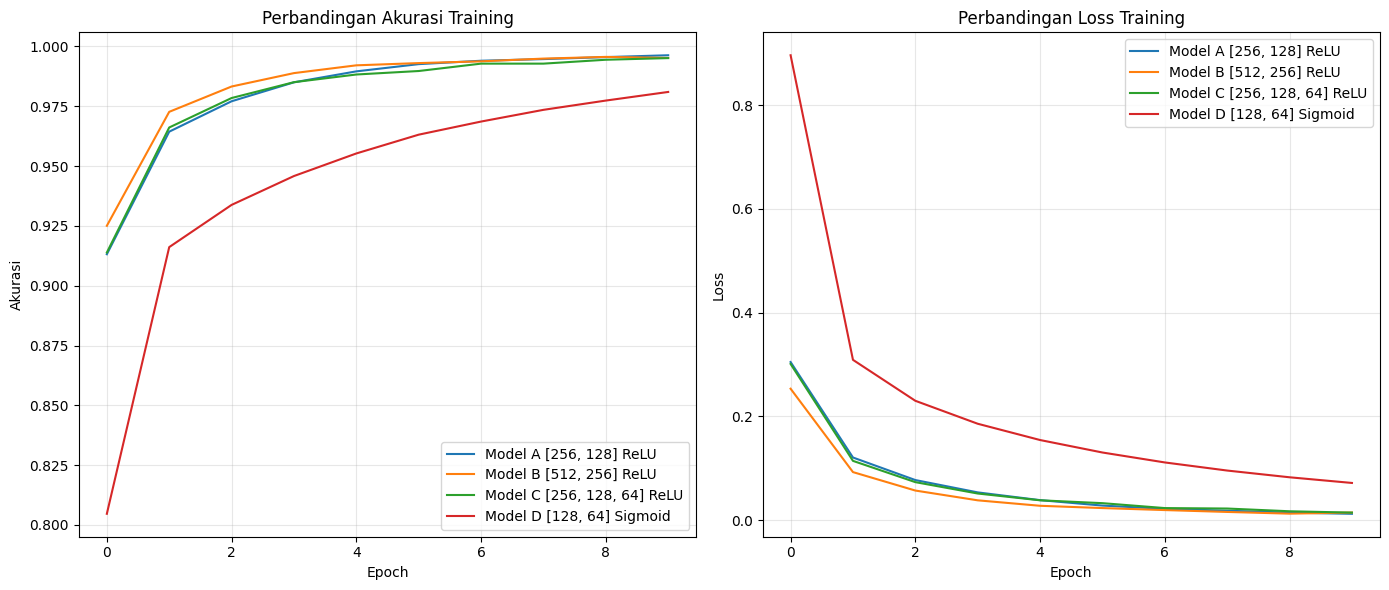


NAMA MODEL                     | AKURASI    | WAKTU (s) 
Model A [256, 128] ReLU        | 0.9765     | 39.94
Model B [512, 256] ReLU        | 0.9764     | 77.14
Model C [256, 128, 64] ReLU    | 0.9760     | 40.47
Model D [128, 64] Sigmoid      | 0.9714     | 26.64


In [1]:
import time
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Agar hasil bisa direproduksi (opsional, tapi praktik yang baik)
tf.random.set_seed(42)
np.random.seed(42)

def load_and_prep_data():
    """Memuat dan memproses dataset MNIST."""
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalisasi (scaling 0-1)
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    # One-hot encoding
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return (X_train, y_train), (X_test, y_test)

def run_experiment(name, hidden_layers, activation='relu', X_train=None, y_train=None, X_test=None, y_test=None):
    """
    Fungsi modular untuk membangun, melatih, dan mengevaluasi model.
    hidden_layers: list berisi jumlah neuron per layer, misal [256, 128]
    """
    print(f"\n--- Eksperimen: {name} ---")

    # 1. Bangun Arsitektur
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    for neurons in hidden_layers:
        model.add(Dense(neurons, activation=activation))

    model.add(Dense(10, activation='softmax')) # Output layer selalu 10 & softmax

    # 2. Kompilasi
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # 3. Training (hitung waktu)
    start_time = time.time()
    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.2,
                        verbose=0) # verbose 0 agar output tidak penuh
    duration = time.time() - start_time

    # 4. Evaluasi
    loss, acc = model.evaluate(X_test, y_test, verbose=0)

    print(f"Hasil -> Akurasi: {acc:.4f} | Waktu: {duration:.2f} detik")

    return {
        'name': name,
        'history': history,
        'accuracy': acc,
        'duration': duration,
        'loss': loss
    }

# --- EKSEKUSI UTAMA ---

# 1. Persiapan Data
(X_train, y_train), (X_test, y_test) = load_and_prep_data()

# 2. Definisi Skenario Eksperimen
experiments_config = [
    # (Nama, List Layer, Fungsi Aktivasi)
    ("Model A [256, 128] ReLU", [256, 128], 'relu'),
    ("Model B [512, 256] ReLU", [512, 256], 'relu'),
    ("Model C [256, 128, 64] ReLU", [256, 128, 64], 'relu'),
    ("Model D [128, 64] Sigmoid", [128, 64], 'sigmoid')
]

# 3. Jalankan Loop Eksperimen
results = []
for name, layers, act in experiments_config:
    res = run_experiment(name, layers, act, X_train, y_train, X_test, y_test)
    results.append(res)

# 4. Visualisasi (Plotting yang lebih rapi)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Accuracy & Loss
for res in results:
    # Plot Accuracy
    axes[0].plot(res['history'].history['accuracy'], label=res['name'])
    # Plot Loss
    axes[1].plot(res['history'].history['loss'], label=res['name'])

axes[0].set_title('Perbandingan Akurasi Training')
axes[0].set_ylabel('Akurasi')
axes[0].set_xlabel('Epoch')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].set_title('Perbandingan Loss Training')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Ringkasan Akhir
print("\n" + "="*50)
print(f"{'NAMA MODEL':<30} | {'AKURASI':<10} | {'WAKTU (s)':<10}")
print("="*50)
for res in results:
    print(f"{res['name']:<30} | {res['accuracy']:.4f}     | {res['duration']:.2f}")
print("="*50)